# Overview

In [ ]:
#imported necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('seaborn-darkgrid')

In [350]:
#loaded in clean data (cleaned in student.ipynb)

df = pd.read_csv('data/testing_data.csv')

In [351]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [352]:
df.grade = df.grade.astype('category')
df.grade = df.grade.cat.reorder_categories(['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
                                                '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])
df.condition = df.condition.astype('category')
df.condition = df.condition.cat.reorder_categories(['Fair', 'Poor', 'Average',
                                                        'Good', 'Very Good'])
df.view = df.view.astype('category')
df.view = df.view.cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])

df.view = df.view.cat.codes
df.grade = df.grade.cat.codes
df.condition =df.condition.cat.codes

In [405]:
#copied citites data mapped by zipcode

cities = {'Algona': [98001], 'Auburn': [98001, 98002, 98003, 98023, 98063, 98071, 98092, 98093], 'Federal Way': [98001, 98003, 98023, 98063, 98093],
         'Beaux Arts Village': [98004], 'Bellevue':[98004, 98005, 98006, 98007, 98008, 98009, 98015], 
          'Clyde Hill': [98004], 'Hunts Point': [98004], 'Yarrow Point': [98004], 'Black Diamond': [98010],
         'Bothell': [98011, 98041, 98028], 'Burton': [98013], 'Vashion': [98013], 'Carnation': [98014],
         'Duvall':[98019], 'Enumclaw': [98022], 'Fall City': [98024], 'Hobart': [98025], 
         'Issaquah': [98027], 'Kent': [98030, 98031, 98032, 98035, 98042, 98064], 'Kirkland':[98033, 98034, 98083],
         'Maple Valley': [98038], 'Medina': [98039], 'Mercer Island': [98040], 'Kenmore': [98028],
         'Covington':[98042], 'North Bend': [98045], 'Pacific':[98047], 'Preston':[98050],
         'Ravensdale':[98051], 'Redmond': [98052, 98053, 98073, 98074], 'Redondo': [98054], 'Renton': [98055, 98056, 98057, 98058, 98059],
         'Newcastle': [98056, 98059,], 'Seahurst':[98062], 'Snoqualmie': [98065, 98068], 'Snoqualmie Pass': [98068],
         'Vashon': [98070], 'Woodinville': [98072], 'Sammamish':[98075, 98075], 'Issaquah': [98075, 98027, 98029],
         'Seattle': [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98111, 98112, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 
                     98126, 98131, 98132, 98133, 98134, 98136, 98138, 98144, 98145, 98146, 98148, 98154, 98155, 98158, 98160, 98161, 98164, 98166, 98168, 98171, 98174, 98177, 98178, 98188, 98198, 98199 ], 
          'Tukwila': [98108, 98138, 98168, 98178, 98188],
         'Shoreline': [98133, 98155, 98177 ], 'Burien': [98146, 98148, 98166, 98168 ], 'Des Moines' : [98148, 98198], 'Normandy Park': [98148, 98166, 98198], 'Seatac': [98148, 98158, 98168, 98188, 98198], 
          'Lake Forest Park': [98155, 98155, 98155], 'Baring': [98224], 'Skykomish': [98288]}

#created pandas dataframes for each city with the columns in df

data = {}

for i in cities.keys():
    if i in df.columns:
        data[i] = df[df[i] == 1]
    else:
        continue

##### center_geolcation(geolocations) function was taken from amites github https://gist.github.com/amites/3718961

In [358]:
from math import cos, sin, atan2, sqrt, pi

def center_geolocation(geolocations):
    """
    Provide a relatively accurate center lat, lon returned as a list pair, given
    a list of list pairs.
    ex: in: geolocations = ((lat1,lon1), (lat2,lon2),)
        out: (center_lat, center_lon)
    """
    x = 0
    y = 0
    z = 0

    for lat, lon in geolocations:
        lat = float(lat *(pi/180))
        lon = float(lon * (pi/180))
        x += cos(lat) * cos(lon)
        y += cos(lat) * sin(lon)
        z += sin(lat)

    x = float(x / len(geolocations))
    y = float(y / len(geolocations))
    z = float(z / len(geolocations))
    
    degrees1 = atan2(z, sqrt(x * x + y * y))
    degrees2 = atan2(y, x)

    return (degrees1 * (180/pi), degrees2 *(180/pi))

In [406]:
#creating a dictonary of centerpoints of each city

coordinates = {}

for i in data.keys():
    x = data[i]['lat']
    y = data[i]['long']
    pair = list(zip(x,y))
    
    coordinates[i] = pair
    
center_location = {}

for i in data.keys():
    center_location[i] = center_geolocation(coordinates[i])

center_location.pop('Clyde Hill')
center_location.pop('Hunts Point')
center_location.pop('Yarrow Point')

(47.616183826606125, -122.20518721213313)

In [407]:
#mapped the cities for each city

import folium

lat = 47.613417665161194
long = -122.33245505039801

#Create a map of the area
base_map = folium.Map([lat, long], zoom_start=13)

for p in center_location.keys():
    lat = center_location[p][0]
    long = center_location[p][1]
    marker = folium.Marker(location=[lat, long])
    marker.add_to(base_map)
    popup_text = "City: {}, Latitude: {}, Longitude: {}".format(p,lat,long)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker(location=[lat, long], popup=popup)
    marker.add_to(base_map)
base_map

In [408]:
#created a dictionary of dataframes by region using the above map

regions_df = {}

regions_df['Southwest'] = df[(df['Federal Way'] == 1) | (df['Auburn'] == 1) | (df['Algona'] == 1)]
regions_df['Southeast'] = df[(df['Enumclaw'] == 1) | (df['Black Diamond'] == 1) | (df['Maple Valley'] == 1) | 
                             (df['Covington'] == 1) | (df['Kent'] == 1)]
regions_df['Islands'] = df[df['Vashon'] == 1]

regions_df['South_of_Greater_Seattle'] = df[(df['Des Moines'] == 1) | (df['Normandy Park'] == 1) | (df['Seatac'] == 1) | 
                             (df['Burien'] == 1) | (df['Tukwila'] == 1)]
regions_df['Seattle_Region'] = df[df['Seattle'] == 1]
regions_df['Southeast_of_Greater_Seattle'] = df[(df['Renton'] == 1) | (df['Newcastle'] == 1)]
regions_df['Rich'] = df[(df['Mercer Island'] == 1) | (df['Bellevue'] == 1) | (df['Beaux Arts Village'] == 1) | 
                             (df['Medina'] == 1)]
regions_df['Kirkland Region'] = df[df['Kirkland'] == 1]
regions_df['NorthEast'] = df[(df['Kenmore'] == 1) | (df['Bothell'] == 1) | (df['Woodinville'] == 1)]
regions_df['NorthWest'] = df[(df['Shoreline'] == 1) | (df['Lake Forest Park'] == 1)]
regions_df['Redmond Region'] = df[df['Redmond'] == 1]
regions_df['Suburban'] = df[(df['Sammamish'] == 1) | (df['Issaquah'] == 1)]
regions_df['Rural'] = df[(df['Duvall'] == 1) | (df['Carnation'] == 1) | (df['Fall City'] == 1) | 
                             (df['Snoqualmie'] == 1) | (df['North Bend'] == 1)]


# Exploratory Data Anayslis

## Data Exploration by City

In [409]:
city_dfs = {}

for i in cities.keys():
    if i in df.columns:
        data = df[df[i] == 1]
        city_dfs[i] = data
    else:
        continue
    
city_dfs.pop('Beaux Arts Village')
city_dfs.pop('Clyde Hill')
city_dfs.pop('Hunts Point')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Tukwila,Shoreline,Burien,Des Moines,Normandy Park,Seatac,Lake Forest Park,has_basement,recently_renovated
66,975000.0,4,2.50,2720,11049,2.0,0,0,2,7,...,0,0,0,0,0,0,0,0,0,0
69,1330000.0,5,2.25,3200,20158,1.0,0,0,2,5,...,0,0,0,0,0,0,0,0,1,0
102,1090000.0,3,2.50,2920,8113,2.0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,1
123,1450000.0,4,2.75,2750,17789,1.5,0,0,2,5,...,0,0,0,0,0,0,0,0,1,0
265,2900000.0,4,3.25,5050,20100,1.5,0,2,2,8,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21259,1750000.0,4,2.75,3560,8975,2.0,0,0,2,7,...,0,0,0,0,0,0,0,0,0,0
21316,3000000.0,4,3.75,5090,14823,1.0,0,0,2,8,...,0,0,0,0,0,0,0,0,1,0
21319,999999.0,3,2.50,2100,4097,2.0,0,0,2,6,...,0,0,0,0,0,0,0,0,0,0
21354,1700000.0,4,3.50,3830,8963,2.0,0,0,2,7,...,0,0,0,0,0,0,0,0,1,0


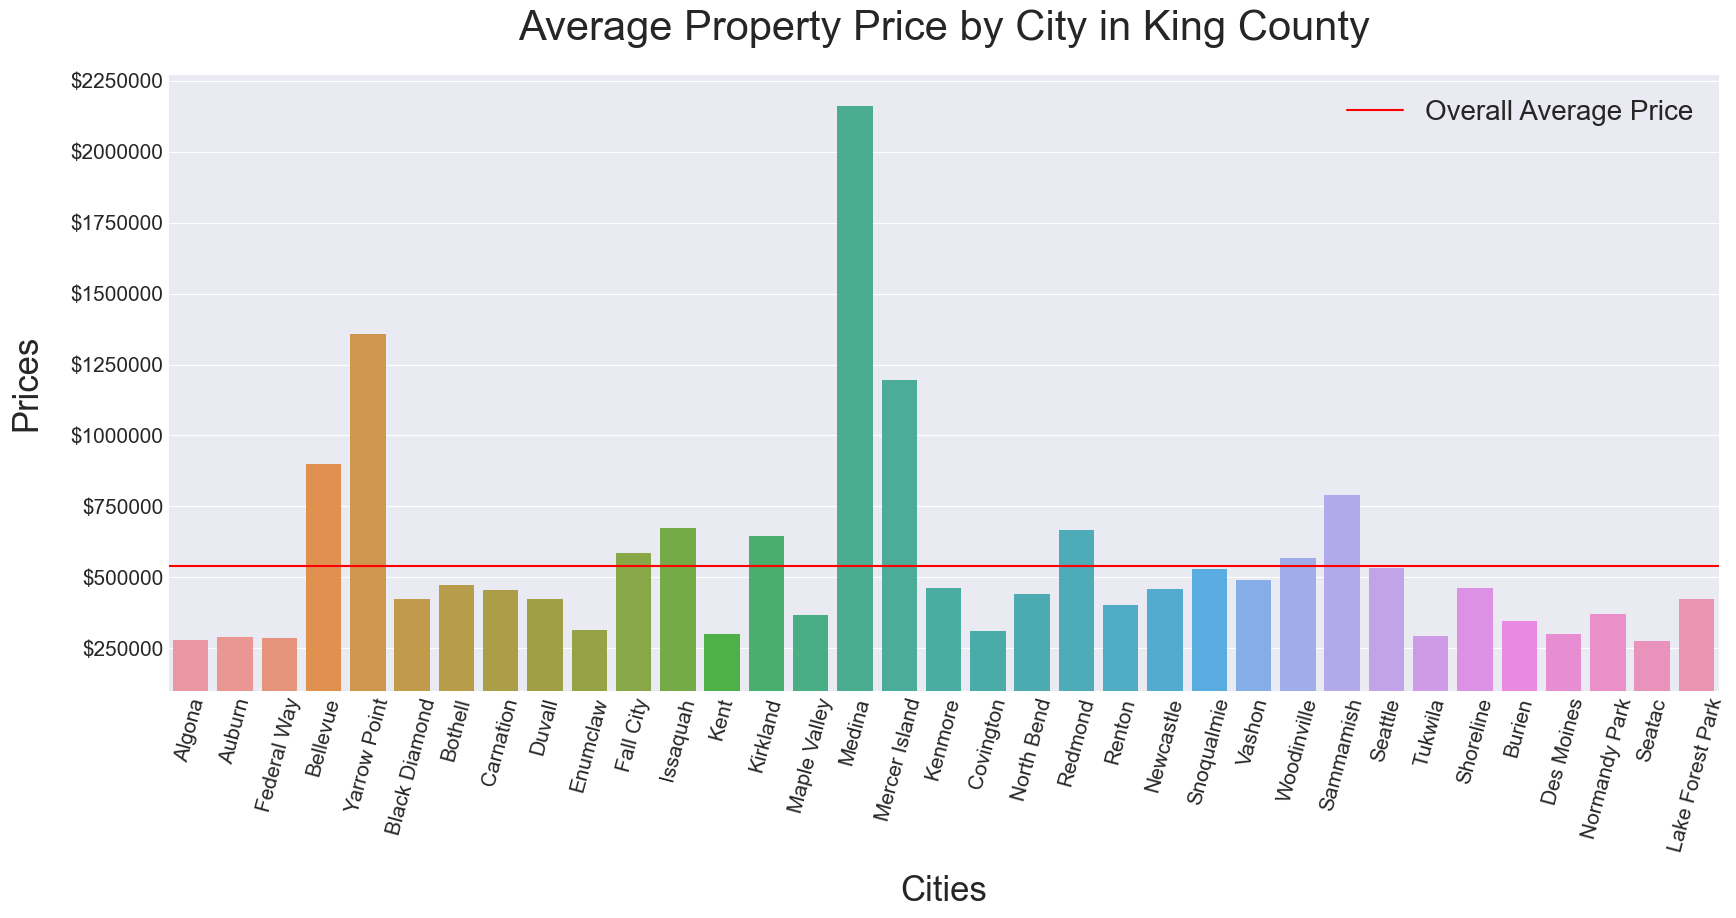

In [411]:
mean_prices = {}

for key, values in city_dfs.items():
    mean = city_dfs[key]['price'].mean()
    mean_prices[key] = mean
    
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=list(mean_prices.keys()), y = list(mean_prices.values()))
ax.set_xticks(list(range(len(city_dfs.keys()))))
ax.set_xticklabels(city_dfs.keys(), rotation =75, fontsize=15)
ax.set_yticks(list(range(0, 2500000, 250000)))
ax.set_yticklabels(['${}'.format(i) for i in range(0,2500000, 250000)], fontsize=15)

ax.set_ylabel('Prices', fontsize= 25)
ax.yaxis.labelpad = 20


ax.set_xlabel('Cities', fontsize= 25)
ax.xaxis.labelpad = 15


ax.set_ylim(100000)
ax.axhline(y = df.price.mean(), color = 'r', linestyle = '-', label='Overall Average Price')

ax.set_title('Average Property Price by City in King County', fontsize=30, pad=25)
plt.legend(fontsize=20)




plt.show()

## Data Exploration by Region

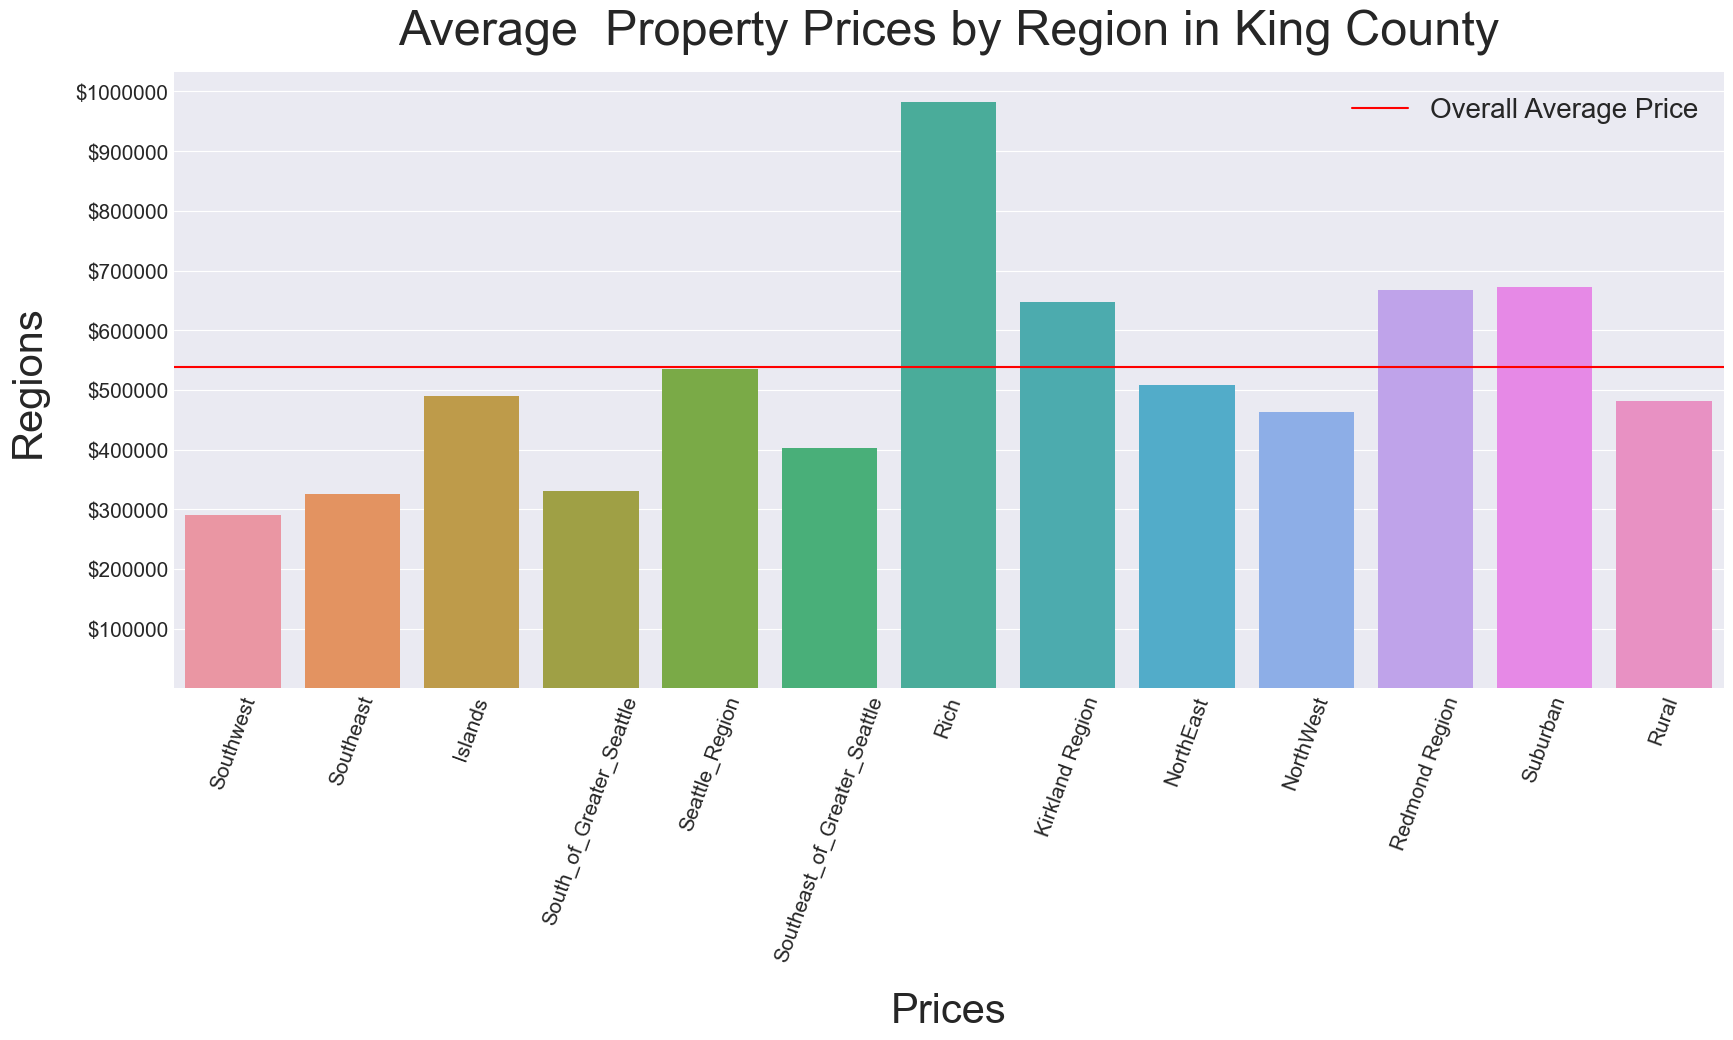

In [412]:
mean_prices = {}

for key, values in regions_df.items():
    mean = regions_df[key]['price'].mean()
    mean_prices[key] = mean
    
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=list(mean_prices.keys()), y = list(mean_prices.values()))

ax.set_xticks(list(range(len(mean_prices))))
ax.set_xticklabels(regions_df.keys(), rotation=70, fontsize=15)
ax.set_yticks(list(range(100000, 1100000, 100000)))
ax.set_yticklabels(['${}'.format(i) for i in range(100000, 1100000, 100000)], fontsize=15)

ax.set_xlabel('Prices', fontsize=30)
ax.set_ylabel('Regions', fontsize=30)

ax.yaxis.labelpad = 20
ax.xaxis.labelpad =20

ax.set_title('Average  Property Prices by Region in King County', fontsize =35, pad=20)

ax.axhline(y = df.price.mean(), color = 'r', linestyle = '-', label = 'Overall Average Price')

plt.legend(fontsize=20)
plt.show()

# Linear Regression Models

##### In this section, we looped through different models in order to determine the best model for each city and model. We realized our r-squared scores were most affect by the technique we used to clean our data and the amount of features in the model. Therefore, we partitoned our code for linear regression into 2 sections, with three subsections each.

## Linear Regression Models for each Region

In [413]:
#imported necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

#poly is used for interactions between highly coorelated ind. variables
poly = PolynomialFeatures(include_bias=False, interaction_only=True)

#variables we looped through
col_selector = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'view', 'waterfront', 
               'has_basement', 'condition', 'floors', 'recently_renovated']


all_models = {'df_type':[], 'cleaning_method': [], 'ind_vars': [], 'rsquared': [], 'MAE': [], 'RMSE': [], 
              'num_of_feats': [], 'model': [], 'test_size': []}

def add_model(df_type, cleaning_method, ind_vars, rsquared, MAE, RMSE, test_size, num_of_feats, model):
    
    """
    This function takes in the following paramaters and adds them to a dictonary. The purpose
    is to later change the dictonary into a pandas dataframe to find the best linear regression model
    for each region by it's best r-squared value
    
    
    """
    
    all_models['df_type'].append(df_type)
    all_models['cleaning_method'].append(cleaning_method)
    all_models['ind_vars'].append(ind_vars)
    all_models['rsquared'].append(rsquared)
    all_models['MAE'].append(MAE)
    all_models['RMSE'].append(RMSE)
    all_models['num_of_feats'].append(num_of_feats)
    all_models['model'].append(model)
    all_models['test_size'].append(test_size)    


### Not Cleaning Outliers - Regions
We did not clean outliers before doing linear regression on each region.

In [194]:
cleaning_method = 'None'

for counter in range(2,6):
    
    for i in regions_df.keys():
    
        df_type = i
        
        #chooses the highest coorelated variables to price
        col_lst = list(regions_df[i].loc[:, col_selector].corr().price.sort_values(ascending=False).index)[1:counter]
    
        x = regions_df[i][col_lst]
        X = poly.fit_transform(x)
        y = regions_df[i]['price']
    
    
        test = None
        
        #we use a higher test size for smaller datasets
        if len(regions_df[i]) < 300:
            test = 0.3
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
        else:
            test = 0.2
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
        lr = LinearRegression()
    
        lr.fit(X_train, y_train)
        rsquared = lr.score(X_train, y_train)
        y_pred = lr.predict(X_test)
    
    
        MAE = mean_absolute_error(y_pred, y_test)
        RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
        
        feats = lr.n_features_in_

        model_dict= {}
        error_dict = {}
        
        #as mentioned before this function is adding all the features of the model to a dictonary
        add_model(df_type, cleaning_method, col_lst, rsquared, MAE, RMSE, test, feats, lr)

## Cleaning outliers by quantile range

In [414]:
#creates a copy of the regions_df dictionary
quantile_dfs = regions_df.copy()

for i in quantile_dfs.keys():
    for x in col_selector:    
        
        data = quantile_dfs[i][x]

        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        
        #replaces outliers with quantile range
        quantile_dfs[i][x] = np.where(data > upper, upper, data)
        quantile_dfs[i][x] = np.where(data < lower, lower, data)

In [272]:
cleaning_method = 'quantile'

for counter in range(2,6):
    
    for i in quantile_dfs.keys():
    
        df_type = i
    
        col_lst = list(quantile_dfs[i].loc[:, col_selector].corr().price.sort_values(ascending=False).index)[1:counter]
    
        x = quantile_dfs[i][col_lst]
        X = poly.fit_transform(x)
        y = quantile_dfs[i]['price']
    
    
        test = None
    
        if len(quantile_dfs[i]) < 300:
            test = 0.3
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
        else:
            test = 0.2
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
        lr = LinearRegression()
    
        lr.fit(X_train, y_train)
        rsquared = lr.score(X_train, y_train)
        y_pred = lr.predict(X_test)
    
    
        MAE = mean_absolute_error(y_pred, y_test)
        RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
        
        feats = lr.n_features_in_
        
        add_model(df_type, cleaning_method, col_lst, rsquared, MAE, RMSE, test, feats, lr)

## Cleaning model by logarithmic

In [415]:
#makes a copy of the regions_df dict
log_dfs = regions_df.copy()

#logs each coorelated variable
for i in log_dfs.keys():
    for x in col_selector:
        log_dfs[i][x] = log_dfs[i][x].map(lambda k: np.log(k) if k > 0 else 0)

In [274]:
cleaning_method = 'log'

for counter in range(2,6):
    
    for i in regions_df.keys():
    
        df_type = i
    
        col_lst = list(regions_df[i].loc[:, col_selector].corr().price.sort_values(ascending=False).index)[1:counter]
    
        x = regions_df[i][col_lst]
        X = poly.fit_transform(x)
        y = regions_df[i]['price']
    
    
        test = None
    
        if len(regions_df[i]) < 300:
            test = 0.3
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
        else:
            test = 0.2
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
        lr = LinearRegression()
    
        lr.fit(X_train, y_train)
        rsquared = lr.score(X_train, y_train)
        y_pred = lr.predict(X_test)
    
    
        MAE = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
        RMSE = np.sqrt(mean_squared_error(np.exp(y_pred), np.exp(y_test)))
        
        feats = lr.n_features_in_
        
        add_model(df_type, cleaning_method, col_lst, rsquared, MAE, RMSE, test, feats, lr)

# Linear Models for Cities

## No Cleaning Outliers

In [277]:
cleaning_method = 'None'

for counter in range(2,6):
    
    for i in city_dfs.keys():
    
        df_type = i
    
        col_lst = list(city_dfs[i].loc[:, col_selector].corr().price.sort_values(ascending=False).index)[1:counter]
    
        x = city_dfs[i][col_lst]
        X = poly.fit_transform(x)
        y = city_dfs[i]['price']
    
    
        test = None
    
        if len(city_dfs[i]) < 300:
            test = 0.4
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
        else:
            test = 0.3
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
        lr = LinearRegression()
    
        lr.fit(X_train, y_train)
        rsquared = lr.score(X_train, y_train)
        y_pred = lr.predict(X_test)
    
    
        MAE = mean_absolute_error(y_pred, y_test)
        RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
        
        feats = lr.n_features_in_
        
        add_model(df_type, cleaning_method, col_lst, rsquared, MAE, RMSE, test, feats, lr)

## Cleaning outliers in city set with quantile replacement

In [278]:
quantile_city_dfs = city_dfs.copy()

for i in quantile_city_dfs.keys():
    for x in col_selector:    
        
        data = quantile_city_dfs[i][x]

        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        quantile_city_dfs[i][x] = np.where(data > upper, upper, data)
        quantile_city_dfs[i][x] = np.where(data < lower, lower, data)

In [279]:
cleaning_method = 'quantile'

for counter in range(2,6):
    
    for i in quantile_city_dfs.keys():
    
        df_type = i
    
        col_lst = list(quantile_city_dfs[i].loc[:, col_selector].corr().price.sort_values(ascending=False).index)[1:counter]
    
        x = quantile_city_dfs[i][col_lst]
        X = poly.fit_transform(x)
        y = quantile_city_dfs[i]['price']
    
    
        test = None
    
        if len(quantile_city_dfs[i]) < 300:
            test = 0.3
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
        else:
            test = 0.2
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
        lr = LinearRegression()
    
        lr.fit(X_train, y_train)
        rsquared = lr.score(X_train, y_train)
        y_pred = lr.predict(X_test)
    
    
        MAE = mean_absolute_error(y_pred, y_test)
        RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
        
        feats = lr.n_features_in_
        
        add_model(df_type, cleaning_method, col_lst, rsquared, MAE, RMSE, test, feats, lr)

## Cleaning Outliers in city set with logartimethic

In [280]:
log_city_dfs = city_dfs.copy()

for i in log_city_dfs.keys():
    for x in col_selector:
        log_city_dfs[i][x] = log_city_dfs[i][x].map(lambda k: np.log(k) if k > 0 else 0)

In [281]:
cleaning_method = 'log'

for counter in range(2,6):
    
    for i in log_city_dfs.keys():
    
        df_type = i
    
        col_lst = list(log_city_dfs[i].loc[:, col_selector].corr().price.sort_values(ascending=False).index)[1:counter]
    
        x = log_city_dfs[i][col_lst]
        X = poly.fit_transform(x)
        y = log_city_dfs[i]['price']
    
    
        test = None
    
        if len(log_city_dfs[i]) < 300:
            test = 0.3
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
        else:
            test = 0.2
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
        lr = LinearRegression()
    
        lr.fit(X_train, y_train)
        rsquared = lr.score(X_train, y_train)
        y_pred = lr.predict(X_test)
    
    
        MAE = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
        RMSE = np.sqrt(mean_squared_error(np.exp(y_pred), np.exp(y_test)))
        
        feats = lr.n_features_in_
        
        add_model(df_type, cleaning_method, col_lst, rsquared, MAE, RMSE, test, feats, lr)

# Evaluating all Models
In this section, we look at all our models and the determine the best model for each city and region by the highest r-squared value.

In [416]:
#created a dataframe using the all_models dict that has been updated with values with each model loop creation
final_df = pd.DataFrame(data=all_models)

In [283]:
final_df

,df_type,cleaning_method,ind_vars,rsquared,MAE,RMSE,num_of_feats,model,test_size
0,Southwest,None,[sqft_living],0.639367,41839.497649,63041.613376,1,LinearRegression(),0.2
1,Southeast,None,[sqft_living],0.589375,49627.399737,77831.162006,1,LinearRegression(),0.2
2,Island,None,[grade],0.415681,97459.193011,154439.216718,1,LinearRegression(),0.3
3,South_of_Seattle,None,[sqft_living],0.445643,75084.948586,135476.818901,1,LinearRegression(),0.2
4,Seattle,None,[sqft_living],0.513363,167431.910111,245535.944436,1,LinearRegression(),0.2
...,...,...,...,...,...,...,...,...,...
571,Burien,log,"[sqft_living, grade, bathrooms, view]",0.682669,62152.998984,81924.206193,10,LinearRegression(),0.2
572,Des Moines,log,"[sqft_living, bathrooms, view, grade]",0.612553,41157.278820,52959.731515,10,LinearRegression(),0.2
573,Normandy Park,log,"[sqft_living, grade, bathrooms, view]",0.667541,64728.172502,94088.912287,10,LinearRegression(),0.2
574,Seatac,log,"[sqft_living, bathrooms, grade, bedrooms]",0.544364,40990.474247,54599.067288,10,LinearRegression(),0.2


##### As you see above, we have 576 linear regression models

## Separating Models by Max R-Squared value

In [417]:
#created 4 dictonaries

#sep_dfs will contain individual dataframes filered by df_type-- ex: Southwest region will have its own dataframe
sep_dfs = {}

#max_rsquares will have the values of the linear regresssion models corresponding to df_type ex: {'Southwest': 0.78}
max_rsquares = {}

#contains the indexes where the rsquared value is maxed -- Ex: {'Southwest': [4]}
indexes = {}

#contains the models by highest r-squared model for each df_type -- Ex: {'Southwest': LinearRegression()}
best_models = {}

for i in final_df.df_type.unique():
    sep_dfs[i] = final_df[final_df.df_type == i]
    
for i in sep_dfs.keys():
    max_rsquares[i] = sep_dfs[i].rsquared.max()
    
for key, value in max_rsquares.items():
    indexes[key] = sep_dfs[key].index[sep_dfs[key].rsquared == value].tolist()
    
for i in sep_dfs.keys():
    best_models[i] = sep_dfs[i].loc[indexes[i][0]]

In [418]:
best_models

{}

# Model Prediction

In this section, we created functions to predict the prices based on selected user input. For example, if someone wants a property with 3 bedrooms, 2bathrooms and 1500 square feet. The output will be a dictonary of the predicted prices by each city and region

In [419]:
def total_model(dct, df_type, cleaning_method, ind_vars, rsquared, MAE, RMSE, test_size, num_of_feats, model):
    
    dct['df_type'].append(df_type)
    dct['cleaning_method'].append(cleaning_method)
    dct['ind_vars'].append(ind_vars)
    dct['rsquared'].append(rsquared)
    dct['MAE'].append(MAE)
    dct['RMSE'].append(RMSE)
    dct['num_of_feats'].append(num_of_feats)
    dct['model'].append(model)
    dct['test_size'].append(test_size)

In [311]:
def cities_prices(dct, cols):
    """
    
    This function takes in two paramaters: a dictornary and inputted columns. The dictionary is empty which is added to 
    as the function loops through each model. The columns is the selected variables the user wants. 
    Ex: 
    
    dct = {'df_type':[], 'cleaning_method': [], 'ind_vars': [], 'rsquared': [], 'MAE': [], 'RMSE': [], 
            'num_of_feats': [], 'model': [], 'test_size': []}
    cols = ['bedrooms', 'grade', 'sqft_living']
    
    """
    
    poly = PolynomialFeatures(include_bias=False, interaction_only=True)

    cleaning_method = ['None', 'quantile']

    for clean in cleaning_method:
        
        if clean == 'quantile':
            
            quantile = city_dfs.copy()

            for key in quantile.keys():
                for col in col_selector:    
        
                    data = quantile[key][col]

                    q1 = data.quantile(0.25)
                    q3 = data.quantile(0.75)
                    iqr = q3 - q1
                    lower = q1 - 1.5*iqr
                    upper = q3 + 1.5*iqr
                    quantile[key][col] = np.where(data > upper, upper, data)
                    quantile[key][col] = np.where(data < lower, lower, data)
        
        
            for i in quantile.keys():
    
                df_type = i
        
                x = quantile[i][cols]
                X = poly.fit_transform(x)
                y = quantile[i]['price']    
    
                test = None
    
                if len(quantile[i]) < 300:
                    test = 0.4
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
                else:
                    test = 0.3
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
                lr = LinearRegression()
    
                lr.fit(X_train, y_train)
                rsquared = lr.score(X_train, y_train)
                y_pred = lr.predict(X_test)
    
    
                MAE = mean_absolute_error(y_pred, y_test)
                RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
        
                feats = lr.n_features_in_
        
                total_model(dct, df_type, clean, cols, rsquared, MAE, RMSE, test, feats, lr)
            
            
        elif clean == 'log':
                
            log = city_dfs.copy()

            for i in log.keys():
                for x in col_selector:
                    log[i][x] = log[i][x].map(lambda k: np.log(k) if k > 0 else 0)
        
        
            for i in log.keys():
    
                df_type = i
        
                x = log[i][cols]
                X = poly.fit_transform(x)
                y = log[i]['price']
    
    
                test = None
    
                if len(log[i]) < 300:
                    test = 0.4
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
                else:
                    test = 0.3
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
                lr = LinearRegression()
    
                lr.fit(X_train, y_train)
                rsquared = lr.score(X_train, y_train)
                y_pred = lr.predict(X_test)
    
    
                MAE = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
                RMSE = np.sqrt(mean_squared_error(np.exp(y_pred), np.exp(y_test)))
        
                feats = lr.n_features_in_
        
                total_model(dct, df_type, clean, cols, rsquared, MAE, RMSE, test, feats, lr)
            
        else:
                
            norm = city_dfs.copy()
                
            for i in norm.keys():
    
                df_type = i
    
                x = norm[i][cols]
                X = poly.fit_transform(x)
                y = norm[i]['price']
    
    
                test = None
    
                if len(norm[i]) < 300:
                    test = 0.4
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
                else:
                    test = 0.3
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
                lr = LinearRegression()
    
                lr.fit(X_train, y_train)
                rsquared = lr.score(X_train, y_train)
                y_pred = lr.predict(X_test)
    
    
                MAE = mean_absolute_error(y_pred, y_test)
                RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
        
                feats = lr.n_features_in_
        
                total_model(dct, df_type, clean, cols, rsquared, MAE, RMSE, test, feats, lr)
                
    

In [312]:
def region_prices(dct, cols):
    
    """
    
    This function takes in two paramaters: a dictornary and inputted columns. The dictionary is empty which is added to 
    as the function loops through each model. The columns is the selected variables the user wants. 
    Ex: 
    dct = {'df_type':[], 'cleaning_method': [], 'ind_vars': [], 'rsquared': [], 'MAE': [], 'RMSE': [], 
            'num_of_feats': [], 'model': [], 'test_size': []}
    cols = ['bedrooms', 'grade', 'sqft_living']
    
    """
    
    
    poly = PolynomialFeatures(include_bias=False, interaction_only=True)

    cleaning_method = ['None', 'quantile']

    for clean in cleaning_method:
        
        if clean == 'quantile':
            
            quantile = regions_df.copy()

            for key in quantile.keys():
                for col in col_selector:    
        
                    data = quantile[key][col]

                    q1 = data.quantile(0.25)
                    q3 = data.quantile(0.75)
                    iqr = q3 - q1
                    lower = q1 - 1.5*iqr
                    upper = q3 + 1.5*iqr
                    quantile[key][col] = np.where(data > upper, upper, data)
                    quantile[key][col] = np.where(data < lower, lower, data)
        
        
            for i in quantile.keys():
    
                df_type = i
        
                x = quantile[i][cols]
                X = poly.fit_transform(x)
                y = quantile[i]['price']
    
    
                test = None
    
                if len(quantile[i]) < 300:
                    test = 0.4
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
                else:
                    test = 0.3
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
                lr = LinearRegression()
    
                lr.fit(X_train, y_train)
                rsquared = lr.score(X_train, y_train)
                y_pred = lr.predict(X_test)
    
    
                MAE = mean_absolute_error(y_pred, y_test)
                RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
        
                feats = lr.n_features_in_
        
                total_model(dct, df_type, clean, cols, rsquared, MAE, RMSE, test, feats, lr)
            
            
        elif clean == 'log':
                
            log = regions_df.copy()

            for i in log.keys():
                for x in col_selector:
                    log[i][x] = log[i][x].map(lambda k: np.log(k) if k > 0 else 0)
        
        
            for i in log.keys():
    
                df_type = i
        
                x = log[i][cols]
                X = poly.fit_transform(x)
                y = log[i]['price']
    
    
                test = None
    
                if len(log[i]) < 300:
                    test = 0.4
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
                else:
                    test = 0.3
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
                lr = LinearRegression()
    
                lr.fit(X_train, y_train)
                rsquared = lr.score(X_train, y_train)
                y_pred = lr.predict(X_test)
    
    
                MAE = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
                RMSE = np.sqrt(mean_squared_error(np.exp(y_pred), np.exp(y_test)))
        
                feats = lr.n_features_in_
        
                total_model(dct, df_type, clean, cols, rsquared, MAE, RMSE, test, feats, lr)
            
        else:
                
            norm = regions_df.copy()
                
            for i in norm.keys():
    
                df_type = i
    
                x = norm[i][cols]
                X = poly.fit_transform(x)
                y = norm[i]['price']
    
    
                test = None
    
                if len(norm[i]) < 300:
                    test = 0.4
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
                else:
                    test = 0.3
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
                lr = LinearRegression()
    
                lr.fit(X_train, y_train)
                rsquared = lr.score(X_train, y_train)
                y_pred = lr.predict(X_test)
    
    
                MAE = mean_absolute_error(y_pred, y_test)
                RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
        
                feats = lr.n_features_in_
        
                total_model(dct, df_type, clean, cols, rsquared, MAE, RMSE, test, feats, lr)
                
    

In [420]:
def find_price(dct1, dct2, answers):
    
    """
    
    This function combines the cities_prices() and region_prices() model to predict the prices for each city and region.
    It takes in three dicts. dct1 and dct2 are the empty dicts that will be filled with the models. The answers dict is what
    the user wants. Ex: 
    
    answers = {'bathrooms': 3, 'bedrooms': 4, 'sqft_living': 3000}

    dct1 = {'df_type':[], 'cleaning_method': [], 'ind_vars': [], 'rsquared': [], 'MAE': [], 'RMSE': [], 
            'num_of_feats': [], 'model': [], 'test_size': []}
    dct2 = {'df_type':[], 'cleaning_method': [], 'ind_vars': [], 'rsquared': [], 'MAE': [], 'RMSE': [], 
            'num_of_feats': [], 'model': [], 'test_size': []}
    
    
    """
       
    
    cols = list(answers.keys())
    vals1 = poly.fit_transform(pd.Series(answers).values.reshape(1,-1))
    
    cities_prices(dct1, cols)
    region_prices(dct2, cols)
    
    df1 = pd.DataFrame(data=dct1)
    df2 = pd.DataFrame(data=dct2)
    
    best_city_prices = {}
    best_region_prices = {}
    
    for i in city_dfs.keys():
        d = df1[df1.df_type == i]
        max_rsquared = d.rsquared.max()
        r = d.index[d.rsquared == max_rsquared].tolist()
        m = d.loc[r[0]]
        best_city_prices[i] = m.model.predict(vals1)
        
    for i in regions_df.keys():
        d = df2[df2.df_type == i]
        max_rsquared = d.rsquared.max()
        r = d.index[d.rsquared == max_rsquared].tolist()
        m = d.loc[r[0]]
        best_region_prices[i] = m.model.predict(vals1)
    
     
    min_city = min(best_city_prices, key=best_city_prices.get)
    min_val = best_city_prices[min_city]
    
    min_region = min(best_region_prices, key=best_region_prices.get)
    min_val_region = best_region_prices[min_region]
    
    max_city = max(best_city_prices, key=best_city_prices.get)
    max_val = best_city_prices[max_city]
    
    max_region = max(best_region_prices, key=best_region_prices.get)
    max_val_region = best_region_prices[max_region]
    
    print('{} : {}'.format(min_city, min_val))
    print('{}: {}'.format(min_region, min_val_region))
    
    print('{} : {}'.format(max_city, max_val))
    print('{}: {}'.format(max_region, max_val_region))
    
    
    return df1, df2, best_city_prices, best_region_prices

## Testing the Product

In this last part, we test the find_price() function by testing three different sets of parameters.

In [319]:

test = {'bathrooms': 3, 'bedrooms': 4, 'sqft_living': 3000}

townz = {'df_type':[], 'cleaning_method': [], 'ind_vars': [], 'rsquared': [], 'MAE': [], 'RMSE': [], 
            'num_of_feats': [], 'model': [], 'test_size': []}
areaz = {'df_type':[], 'cleaning_method': [], 'ind_vars': [], 'rsquared': [], 'MAE': [], 'RMSE': [], 
            'num_of_feats': [], 'model': [], 'test_size': []}

frame, frame1, price, price1 = find_price(townz, areaz, test)

print("-------------------------------------------------")


test2 = {'bathrooms': 1, 'bedrooms': 1, 'sqft_living': 800}

town20 = {'df_type':[], 'cleaning_method': [], 'ind_vars': [], 'rsquared': [], 'MAE': [], 'RMSE': [], 
            'num_of_feats': [], 'model': [], 'test_size': []}
area20 = {'df_type':[], 'cleaning_method': [], 'ind_vars': [], 'rsquared': [], 'MAE': [], 'RMSE': [], 
            'num_of_feats': [], 'model': [], 'test_size': []}

frame2, frame22, price2, price22 = find_price(town20, area20, test2)

print("-------------------------------------------------")

test3 = {'bathrooms': 3, 'bedrooms': 6, 'sqft_living': 5000, 'grade':5 }

town300 = {'df_type':[], 'cleaning_method': [], 'ind_vars': [], 'rsquared': [], 'MAE': [], 'RMSE': [], 
            'num_of_feats': [], 'model': [], 'test_size': []}
area300 = {'df_type':[], 'cleaning_method': [], 'ind_vars': [], 'rsquared': [], 'MAE': [], 'RMSE': [], 
            'num_of_feats': [], 'model': [], 'test_size': []}

frame3, frame33, price3, price33 = find_price(town30, area30, test3)



Federal Way : [396651.40010546]
Southwest: [399257.6713607]
Medina : [1637352.47751468]
Rich: [1022622.75908382]
-------------------------------------------------
Snoqualmie : [40232.36299102]
Southwest: [150330.0373815]
Medina : [942001.5150712]
Island: [435203.55160928]
-------------------------------------------------
Algona : [21318.17972245]
Southwest: [431079.96615299]
Medina : [6804305.51547383]
Island: [1668786.64888825]
